In [1]:
import matplotlib.pyplot as plt
import cv2
import yaml
from os.path import join
import pandas as pd

In [2]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

train_dir = config['paths']['train_data']
test_dir = config['paths']['test_data']
data = config['paths']['data_csv']
fig_path = config['paths']['figure']

In [3]:
pix_train_df = pd.read_csv(join(data, 'training_set_pixel_size_and_HC.csv'))

print(f"Dataset size: {len(pix_train_df)} samples")
pix_train_df.head()

Dataset size: 999 samples


,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75
3,003_HC.png,0.091291,69.00
4,004_HC.png,0.061240,59.81


In [4]:
img_train_prop = []

for filename in pix_train_df['filename']:
    img_path = join(train_dir, filename)
    img = cv2.imread(img_path)
    
    if img is not None:
        height, width, channels = img.shape
        file_format = filename.split(".")[-1]
        
        img_train_prop.append({
            "File name": filename,
            "Height": height,
            "Width": width,
            "Channel": channels,
            "Format": file_format
        })
        
df_properties = pd.DataFrame(img_train_prop)
df_properties

,File name,Height,Width,Channel,Format
0,000_HC.png,540,800,3,png
1,001_HC.png,540,800,3,png
2,002_HC.png,540,800,3,png
3,003_HC.png,540,800,3,png
4,004_HC.png,540,800,3,png
...,...,...,...,...,...
994,801_HC.png,540,800,3,png
995,802_HC.png,540,800,3,png
996,803_HC.png,540,800,3,png
997,804_HC.png,540,800,3,png


In [5]:
pix_test_df = pd.read_csv(join(data, 'test_set_pixel_size.csv'))

print(f"Dataset size: {len(pix_test_df)} samples")
pix_test_df.head()

Dataset size: 335 samples


,filename,pixel size(mm)
0,000_HC.png,0.235857
1,001_HC.png,0.067973
2,002_HC.png,0.165202
3,003_HC.png,0.096674
4,004_HC.png,0.202203


In [6]:
img_test_prop = []

for filename in pix_test_df['filename']:
    img_path = join(test_dir, filename)
    img = cv2.imread(img_path)
    
    if img is not None:
        height, width, channels = img.shape
        file_format = filename.split(".")[-1]
        
        img_test_prop.append({
            "File name": filename,
            "Height": height,
            "Width": width,
            "Channel": channels,
            "Format": file_format
        })
        
df_properties = pd.DataFrame(img_test_prop)
df_properties

,File name,Height,Width,Channel,Format
0,000_HC.png,540,800,3,png
1,001_HC.png,540,800,3,png
2,002_HC.png,540,800,3,png
3,003_HC.png,540,800,3,png
4,004_HC.png,540,800,3,png
...,...,...,...,...,...
330,330_HC.png,540,800,3,png
331,331_HC.png,540,800,3,png
332,332_HC.png,540,800,3,png
333,333_HC.png,540,800,3,png


In [7]:
pix_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel size(mm),999.0,0.139846,0.053005,0.049415,0.108801,0.128357,0.157678,0.39328
head circumference (mm),999.0,174.383093,65.282061,44.300000,153.600000,174.060000,189.825000,346.40000


In [8]:
pix_test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel size(mm),335.0,0.141509,0.057843,0.052559,0.109671,0.125103,0.157191,0.371305


# Data Visualization

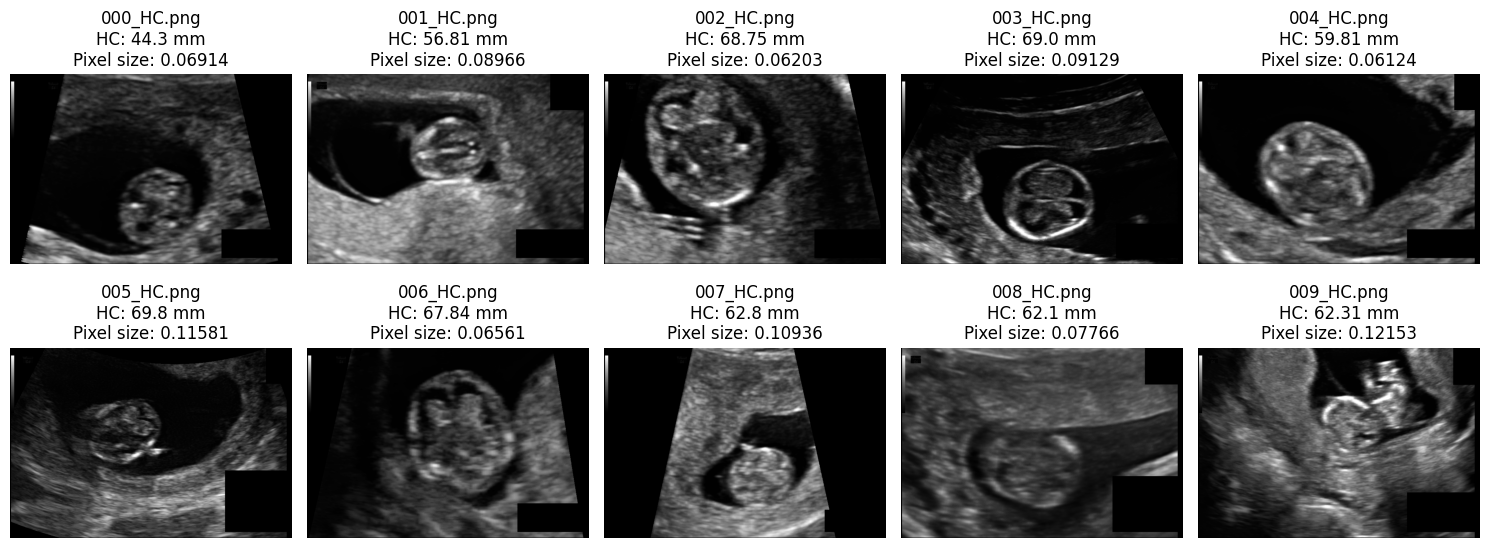

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    img_path = join(train_dir, pix_train_df.iloc[i]['filename'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)    
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{pix_train_df.iloc[i]['filename']}\nHC: {pix_train_df.iloc[i]['head circumference (mm)']} mm\nPixel size: {pix_train_df.iloc[i]['pixel size(mm)']:.5f}")
    ax.axis("off")
plt.tight_layout()
plt.savefig(join(fig_path, 'train_img.png'))
plt.show()

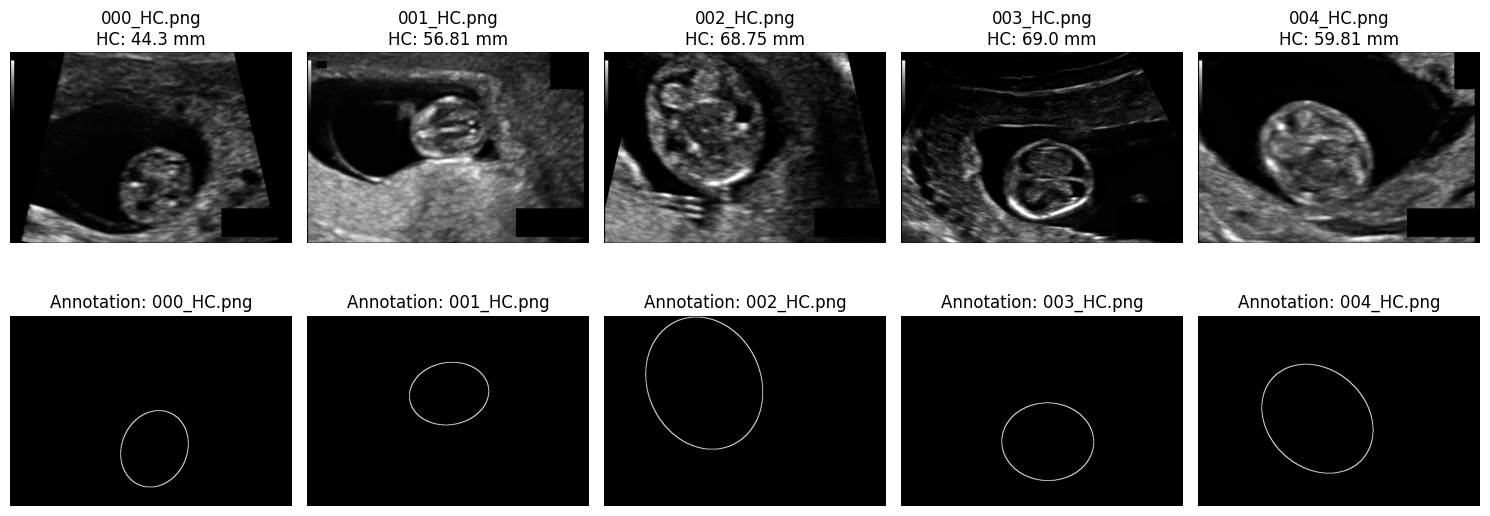

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):  
    if i >= len(pix_train_df):
        break  
    
    img_path = join(train_dir, pix_train_df.iloc[i]['filename'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    annotation_path = img_path.replace(".png", "_Annotation.png")
    annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)

    axes[0, i].imshow(img, cmap="gray")
    axes[0, i].set_title(f"{pix_train_df.iloc[i]['filename']}\nHC: {pix_train_df.iloc[i]['head circumference (mm)']} mm")
    axes[0, i].axis("off")

    axes[1, i].imshow(annotation, cmap="gray")
    axes[1, i].set_title(f"Annotation: {pix_train_df.iloc[i]['filename']}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.savefig(join(fig_path, 'annotation_img.png'))
plt.show()

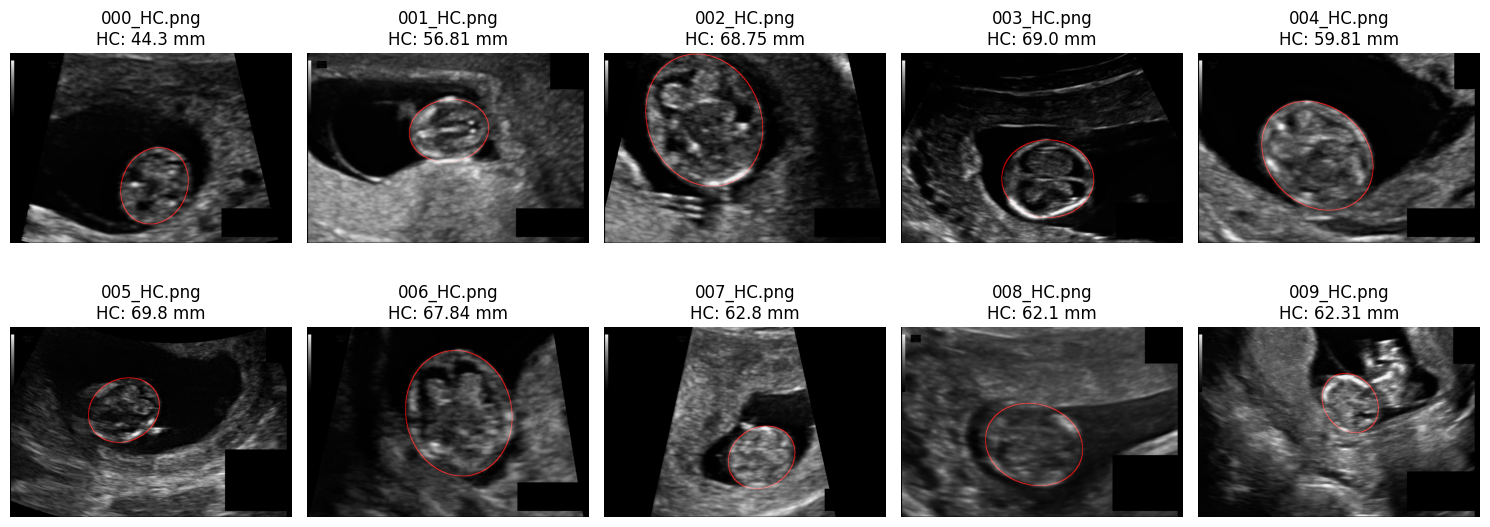

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    img_path = join(train_dir, pix_train_df.iloc[i]['filename'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    annotation_path = img_path.replace(".png", "_Annotation.png")
    annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)
    
    annotation_colored = cv2.cvtColor(annotation, cv2.COLOR_GRAY2BGR)
    annotation_colored[annotation > 0] = [255, 0, 0]
    
    overlay = cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), 1, annotation_colored, 1, 0)
    ax.imshow(overlay, cmap='gray')
    ax.set_title(f"{pix_train_df.iloc[i]['filename']}\nHC: {pix_train_df.iloc[i]['head circumference (mm)']} mm")
    ax.axis("off")

plt.tight_layout()
plt.savefig(join(fig_path, 'detect_border.png'))
plt.show()

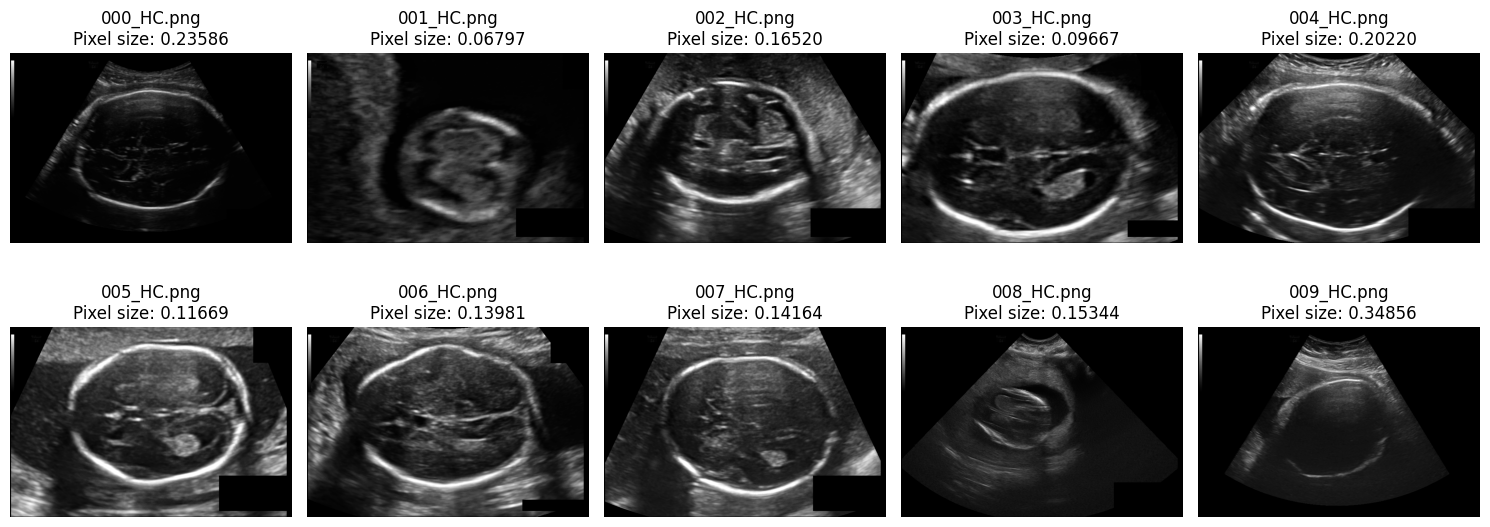

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    img_path = join(test_dir, pix_test_df.iloc[i]['filename'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)    
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{pix_test_df.iloc[i]['filename']}\nPixel size: {pix_test_df.iloc[i]['pixel size(mm)']:.5f}")
    ax.axis("off")
plt.tight_layout()
plt.savefig(join(fig_path, 'test_img.png'))
plt.show()